# Prosper Loan Data Exploratory Analysis
## by Chidera Ibeh

## Introduction
#### Prosper is a peer-to-peer lending platform funded by Investors.  This data set contains 113,937 rows with 81 columns on each loan,  including loan amount, borrower rate, current loan  status, borrower income, borrower employment status, borrower credit  history, and the latest payment information. 


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sbn

%matplotlib inline

In [2]:
#Load dataset into a pandas dataframe
prosper = pd.read_csv('prosperLoanData.csv')

In [3]:
#Check the information summary
prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
#check the top 5 rows
prosper.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
#check for the rows and columns
prosper.shape

(113937, 81)

In [6]:
#check for the various datatypes
prosper.dtypes

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

### What is the structure of your dataset?
##### The dataset has 113,937 rows of data with 81 columns of variables. The variables are mostly categorical and numerical. 

### What is/are the main feature(s) of interest in your dataset?
##### To analyze the characteristics of variables that can determine the amount of loan that can be granted to a customer.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
##### The BorrowerRate, Occupation, LoanStatus, LoanAmount, EmploymentStatus, ListingCategory.

In [7]:
#creating a copy of the dataframe
prosper_clean = prosper.copy()

#### I created a copy of the Dataset so i can perform Data cleaning to some variables to ensure adequate results. 

In [8]:
#Changing the variable to datetime format
prosper_clean['LoanOriginationDate'] = pd.to_datetime(prosper_clean['LoanOriginationDate'])

In [9]:
#Creating columns for time, month and year from the LoanOriginationDate column
prosper_clean['Time'] = pd.DatetimeIndex(prosper_clean['LoanOriginationDate']).time
prosper_clean['Month'] = pd.DatetimeIndex(prosper_clean['LoanOriginationDate']).month
prosper_clean['Year'] = pd.DatetimeIndex(prosper_clean['LoanOriginationDate']).year

In [10]:
#Replace the numbers 1,2... with January, Febuary, ...
prosper_clean['Month'] = prosper_clean['Month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],
        ['January','Febuary', 'March','April','May','June','July','August','September','October','November','December'])

In [11]:
# Convert LoanStatus, ProsperRating (Alpha), ProsperScore into ordered categorical types
ordinal_var_dict = {'LoanStatus': ['Cancelled',  'Chargedoff', 'Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress'
                                   ,'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)',
                                   'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)'],
                    'ProsperRating (Alpha)': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'ProsperScore': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                   'Month': ['January','Febuary', 'March','April','May','June','July','August','September',
                                            'October','November','December'],
                   'Year' : [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014],
                   'IncomeRange' : ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                                   '$75,000-99,999','$100,000+'],
                   'EmploymentStatus': ['Employed', 'Full-time', 'Part-time', 'Self-employed', 'Retired', 'Not employed', 
                                        'Other',
                                        'Not available']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    prosper_clean[var] = prosper_clean[var].astype(ordered_var)

#### The encoding for ListingCategory: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [12]:
#create a column to decode the ListingCategory encoding
ListingCategory = {0: "Not Available", 1: "Debt Consolidation", 2: "Home Improvement", 3: "Business", 4: "Personal Loan", 
            5: "Student Use", 6: "Auto", 7: "Other", 8: "Baby&Adoption", 9: "Boat", 10: "Cosmetic Procedure",
            11: "Engagement Ring", 12: "Green Loans", 13: "Household Expenses", 14: "Large Purchases", 15: "Medical/Dental",
            16: "Motorcycle", 17: "RV", 18: "Taxes", 19: "Vacation", 20: "Wedding Loans"}

prosper_clean['ListingCategory'] = prosper_clean['ListingCategory (numeric)'].replace(ListingCategory)

In [13]:
#check the value counts of ListingCategory
prosper_clean.ListingCategory.unique()

array(['Not Available', 'Home Improvement', 'Motorcycle',
       'Debt Consolidation', 'Other', 'Household Expenses', 'Auto',
       'Medical/Dental', 'Wedding Loans', 'Vacation', 'Business', 'Taxes',
       'Baby&Adoption', 'Personal Loan', 'Engagement Ring',
       'Large Purchases', 'Student Use', 'Boat', 'RV',
       'Cosmetic Procedure', 'Green Loans'], dtype=object)

In [14]:
#Remove columns not needed in order to simplify the data
prosper_clean.drop(columns=['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'ClosedDate', 'LenderYield',
                 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'EmploymentStatusDuration', 'CurrentlyInGroup', 
                 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 
                 'TotalCreditLinespast7years', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 
                 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance',
                 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)',
                            'TradesOpenedLast6Months',
                'IncomeVerifiable', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled',
                 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate',
                 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 
                 'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination', 'LoanOriginationQuarter', 'MemberKey', 
                 'MonthlyLoanPayment', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 
                 'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 
                 'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'InvestmentFromFriendsCount', 'ProsperScore',
                 'InvestmentFromFriendsAmount','LoanOriginationDate', 'IsBorrowerHomeowner', 'BorrowerState',
                'CreditScoreRangeLower','CreditScoreRangeUpper','ListingCategory (numeric)','AmountDelinquent','Time',
                 'OpenRevolvingAccounts','LoanCurrentDaysDelinquent',
                 'CurrentDelinquencies','BorrowerAPR','ProsperRating (numeric)',
                            'ProsperRating (Alpha)','LoanNumber','Month'], inplace=True)

In [15]:
prosper_clean.head(10)

,Term,LoanStatus,BorrowerRate,Occupation,EmploymentStatus,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,Recommendations,Investors,Year,ListingCategory
0,36,Completed,0.1580,Other,Self-employed,0.17,"$25,000-49,999",3083.333333,9425,0,258,2007,Not Available
1,36,Current,0.0920,Professional,Employed,0.18,"$50,000-74,999",6125.000000,10000,0,1,2014,Home Improvement
2,36,Completed,0.2750,Other,Not available,0.06,Not displayed,2083.333333,3001,0,41,2007,Not Available
3,36,Current,0.0974,Skilled Labor,Employed,0.15,"$25,000-49,999",2875.000000,10000,0,158,2012,Motorcycle
4,36,Current,0.2085,Executive,Employed,0.26,"$100,000+",9583.333333,15000,0,20,2013,Home Improvement
5,60,Current,0.1314,Professional,Employed,0.36,"$100,000+",8333.333333,15000,0,1,2013,Debt Consolidation
6,36,Current,0.2712,Sales - Retail,Employed,0.27,"$25,000-49,999",2083.333333,3000,0,1,2013,Debt Consolidation
7,36,Current,0.2019,Laborer,Employed,0.24,"$25,000-49,999",3355.750000,10000,0,1,2013,Home Improvement
8,36,Current,0.0629,Food Service,Employed,0.25,"$25,000-49,999",3333.333333,10000,0,1,2013,Other
9,36,Current,0.0629,Food Service,Employed,0.25,"$25,000-49,999",3333.333333,10000,0,1,2013,Other


In [16]:
prosper_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
Term                   113937 non-null int64
LoanStatus             113937 non-null category
BorrowerRate           113937 non-null float64
Occupation             110349 non-null object
EmploymentStatus       111682 non-null category
DebtToIncomeRatio      105383 non-null float64
IncomeRange            113937 non-null category
StatedMonthlyIncome    113937 non-null float64
LoanOriginalAmount     113937 non-null int64
Recommendations        113937 non-null int64
Investors              113937 non-null int64
Year                   113937 non-null category
ListingCategory        113937 non-null object
dtypes: category(4), float64(3), int64(4), object(2)
memory usage: 8.3+ MB


## Univariate Exploration

#### Exploratory data analysis will be used in this section to examine the data,  I'll be investigating the distributions of individual variables. The "Question-Visualization-Observations" procedure will be used.

### Question 1: What loan amount is most likely going to be granted?

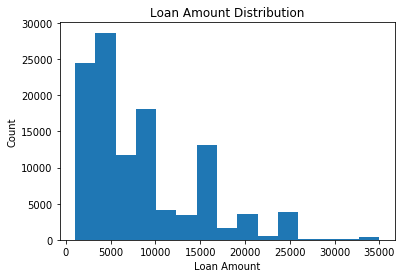

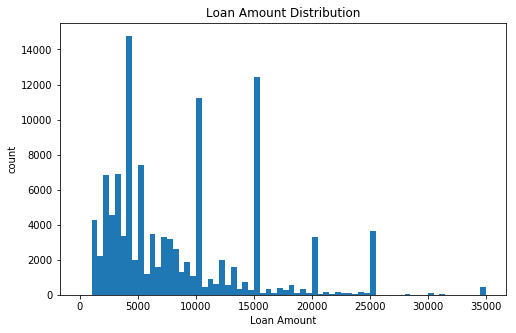

In [17]:
#The origination amount of the loan
plt.hist(data = prosper_clean, x = 'LoanOriginalAmount', bins = 15)
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Loan Amount Distribution');

binsize = 500
bins = np.arange(0, prosper_clean['LoanOriginalAmount'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = prosper_clean, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Amount')
plt.ylabel('count')
plt.title('Loan Amount Distribution');
plt.show()

I observed that the loan amounts likely to be granted are 4k, 10k and 15k. Lesser amount of loan are most likely to be granted.

### Question 2: What is the borrower's interest rate distribution?

In [18]:
#multiply the variable by 100 to get a percentage figure for easy analysis

prosper_clean['BorrowerRate'] = prosper_clean['BorrowerRate']*100

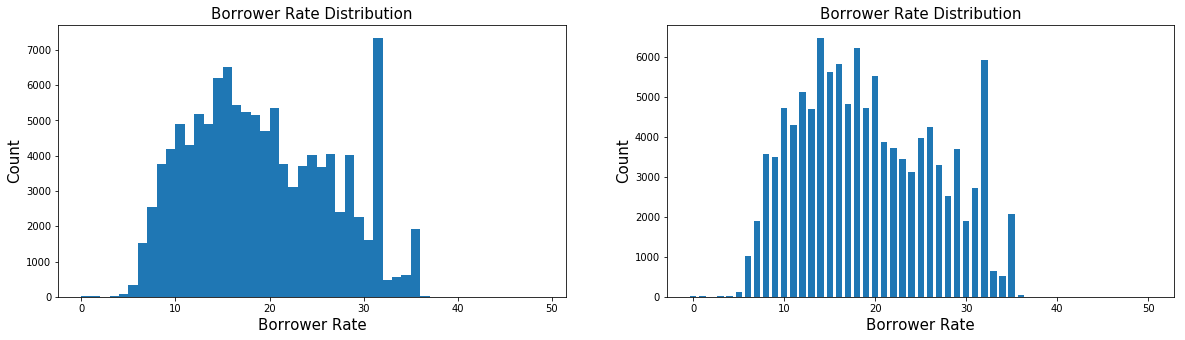

In [19]:
#The Borrower's interest rate for this loan.
plt.figure(figsize = [20,5])

def subplot(x, xlabel, ylabel, title):
    'Creates a histplot by passing in the required parameters'
    # Set xlabel, ylabel and title:
    plt.xlabel(xlabel,size=15)
    plt.ylabel(ylabel, size=15)
    plt.title(title, size=15)


plt.subplot(1,2,1)
bin_vals = np.arange(0, prosper_clean['BorrowerRate'].max(), 1)
hist1 = plt.hist(data = prosper_clean, x = 'BorrowerRate', bins = bin_vals);
subplot(hist1, 'Borrower Rate', 'Count', 'Borrower Rate Distribution')

plt.subplot(1,2,2)
bin_vals = np.arange(-0.5, prosper_clean['BorrowerRate'].max()+1.5, 1)
hist2 = plt.hist(data = prosper_clean, x = 'BorrowerRate', bins = bin_vals, rwidth = 0.7)
subplot(hist1, 'Borrower Rate', 'Count', 'Borrower Rate Distribution');

I observed that the borrower rates tend to peak between 10% and 20% and gradually declines, but there is an outliers around 32% rate.

### Question 3: What is the distribution of loans in each loan status?

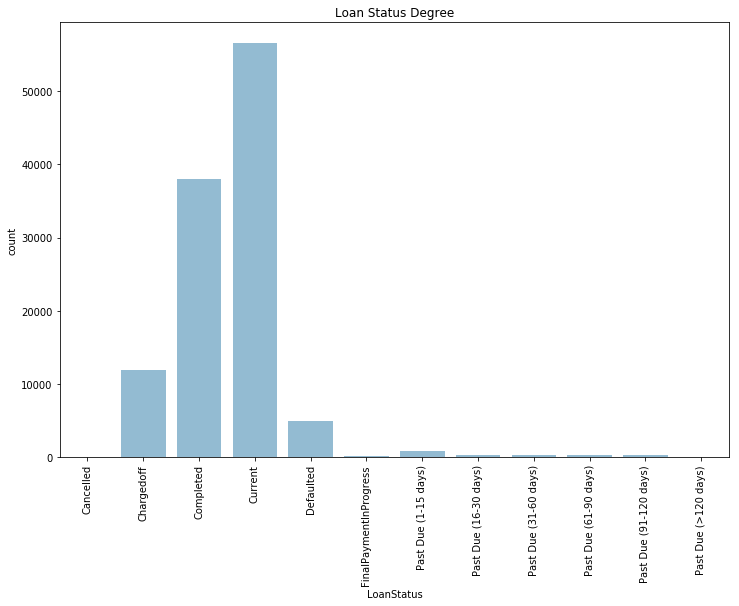

In [20]:
#The current status of the loan
plt.figure(figsize=[12, 8])
base_color = sns.color_palette("Blues")[2]
sns.countplot(data=prosper_clean, x='LoanStatus', color = base_color);
plt.xticks(rotation=90);
plt.title('Loan Status Degree');

I observed that majority of the loan status is the current status, followed by completed status.  

### Question 4: What is the Loan term allocation?

In [21]:
#value count of the term variable
term = prosper_clean['Term'].value_counts()

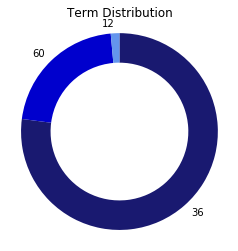

In [22]:
#The length of the loan expressed in months.
plt.pie(term, labels = term.index, startangle = 90, counterclock = False,colors = ['midnightblue', 'mediumblue', 'cornflowerblue'], wedgeprops = {'width' : 0.3})
plt.axis('square')
plt.title('Term Distribution');

The major loan distribution is 36months, while the lowest is 12months.

### Question 5: What year has the most allocated loan?

In [23]:
prosper_clean.Year.value_counts()

2013    34345
2012    19553
2014    12172
2008    11552
2007    11460
2011    11228
2006     5906
2010     5652
2009     2047
2005       22
Name: Year, dtype: int64

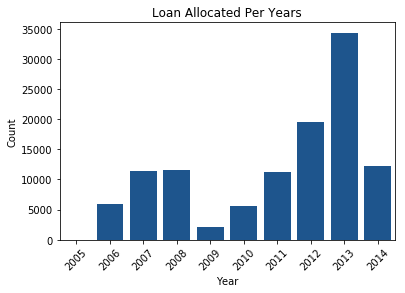

In [24]:
#Check the year with the most allocated loan
sns.countplot(data= prosper_clean, x='Year', color = sns.color_palette("Blues")[5])
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Loan Allocated Per Years');

The year 2013 had the most allocated loan, followed by the year 2012.

### Question 6: What is the most listed category for a loan? 

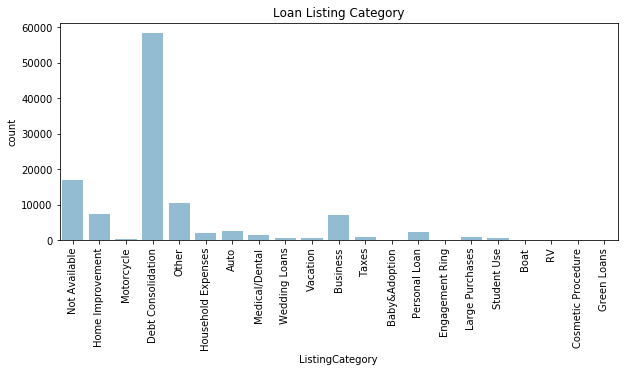

In [25]:
#The category of the listing that the borrower selected for a loan grant
plt.figure(figsize=[10, 4])
base_color = sns.color_palette("Blues")[2]
sns.countplot(data=prosper_clean, x='ListingCategory', color = base_color);
plt.xticks(rotation=90);
plt.title('Loan Listing Category');

The highest listed loan category is the Debt Consolidation.

### Question 7: Will the Employment status affect loan allocation?

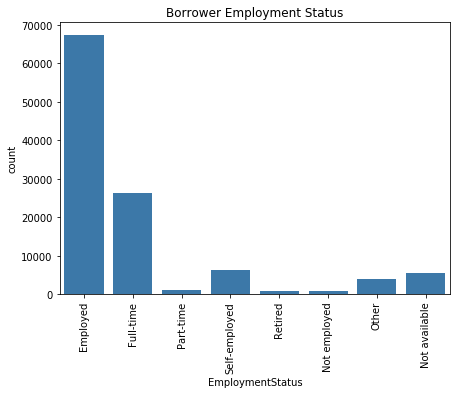

In [26]:
#The employment status of the borrower 
plt.figure(figsize=[7, 5])
base_color = sns.color_palette("Blues")[4]
sns.countplot(data=prosper_clean, x='EmploymentStatus', color = base_color);
plt.xticks(rotation=90);
plt.title('Borrower Employment Status');

Majority of the borrower's are Employed. 

### Question 8: Does Borrower Occupation affect loan grant?

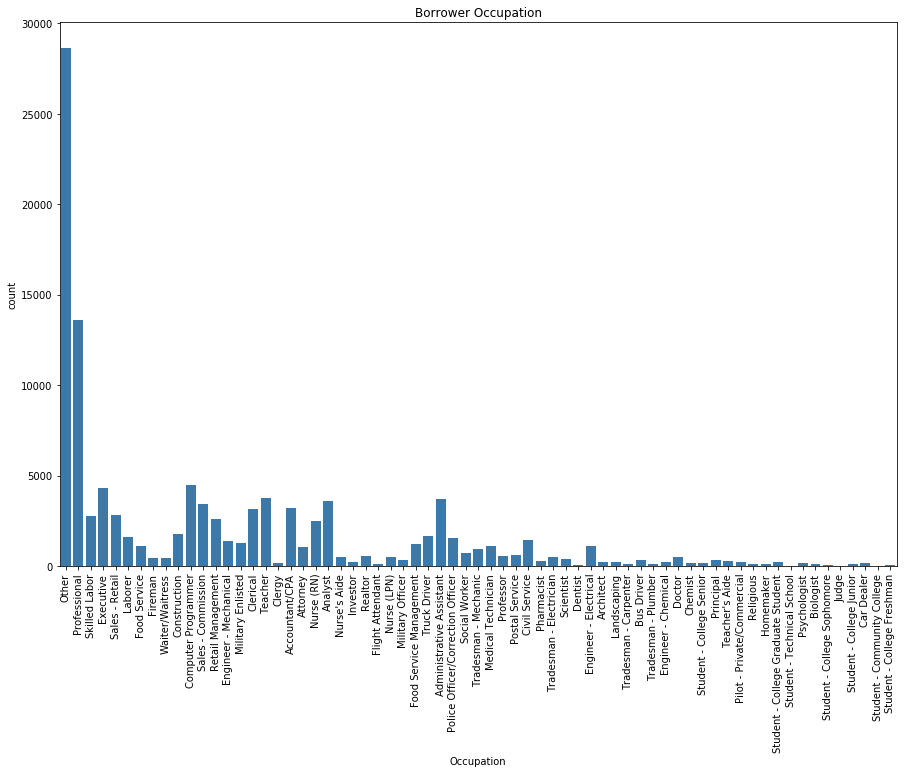

In [27]:
#check the major occupation that applies for loan
plt.figure(figsize=[15, 10])
base_color = sns.color_palette("Blues")[4]
sns.countplot(data=prosper_clean, x='Occupation', color = base_color);
plt.xticks(rotation=90);
plt.title('Borrower Occupation');

Non-specified occupation(Other) was the highest, followed by professionals.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The LoanAmount had 3 high point at 4k,10k anf 15k. It gave a clear description of a Trimodal chart. There were no unusual points.

Also, the Loan year, I noticed that there was an increase from 2009 to a very high increase in 2013, then a sharp decrease in 2014.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I did some Data cleaning to ensure that the data is precise and easy to understand. I dropped some columns, changed data types to the accurate datatypes like ListingCategory, EmploymentStatus to a categorical datatype. I splitted the LoanOriginationDate to 3 different categories to help me get the specific loan year. 

I didnt notice any unusual distribution, there was no need to perform any transformation.

## Bivariate Exploration
In this session, I will examine any concurrent relationship between two variables to check for correlation i.e how they relate or affect eachother. 

### Question 9: What is the relationship between Loan Term and Loan Status?

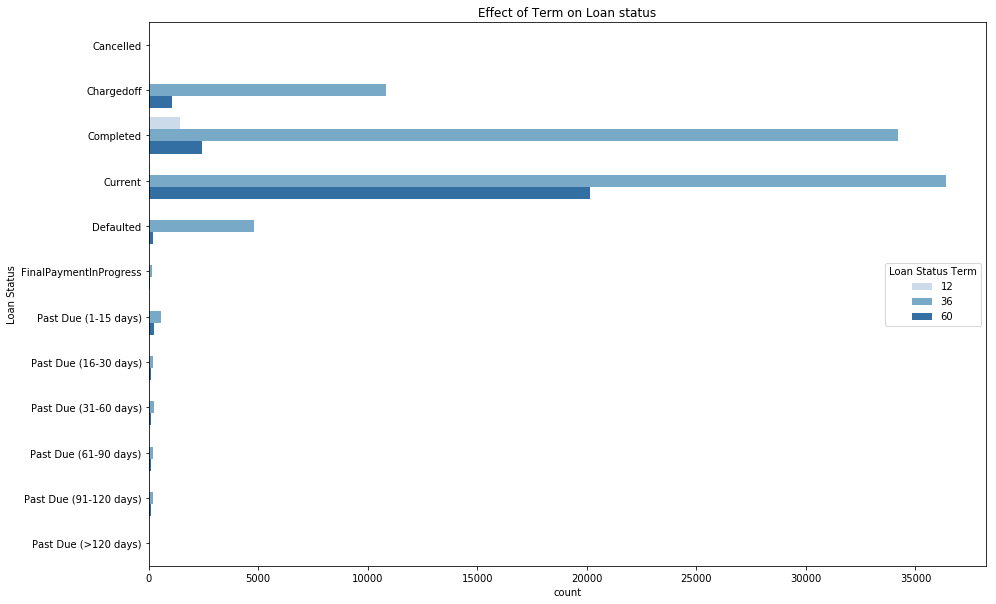

In [28]:
#Check the relationship between loan status and term
plt.figure(figsize = [15, 10])
ax = sns.countplot(data = prosper_clean, y = 'LoanStatus', hue = 'Term',
                   palette = 'Blues')
ax.legend(title = 'Loan Status Term')
plt.title('Effect of Term on Loan status')
plt.ylabel('Loan Status');

The 36months loan term has the highest completed, current and defaulted loan status. 12months loan term are usually completed.

### Question 10: Are there weak or strong correlation between certain variables?

In [29]:
#Using a heat map to check for correlation
numeric_vars = ['BorrowerRate', 'Term', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount','Investors']

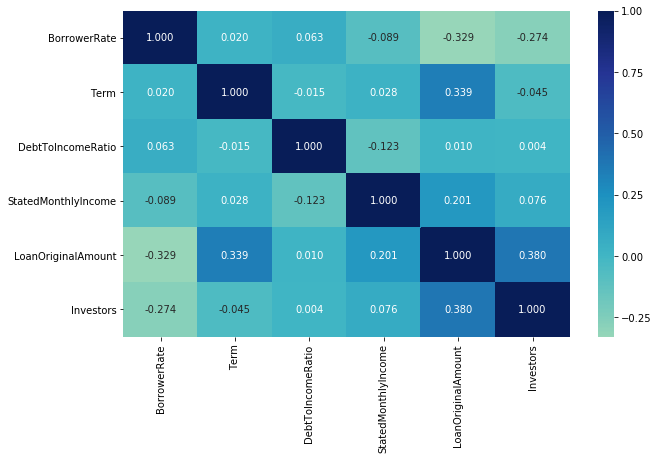

In [30]:
#correlation between numerical variables
plt.figure(figsize = [10, 6])
sns.heatmap(prosper_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'YlGnBu', center = 0);

There are no strong correlation between the various variables.

### Question 11: Using Scatterplot to further understand the weak positive/negative correlation

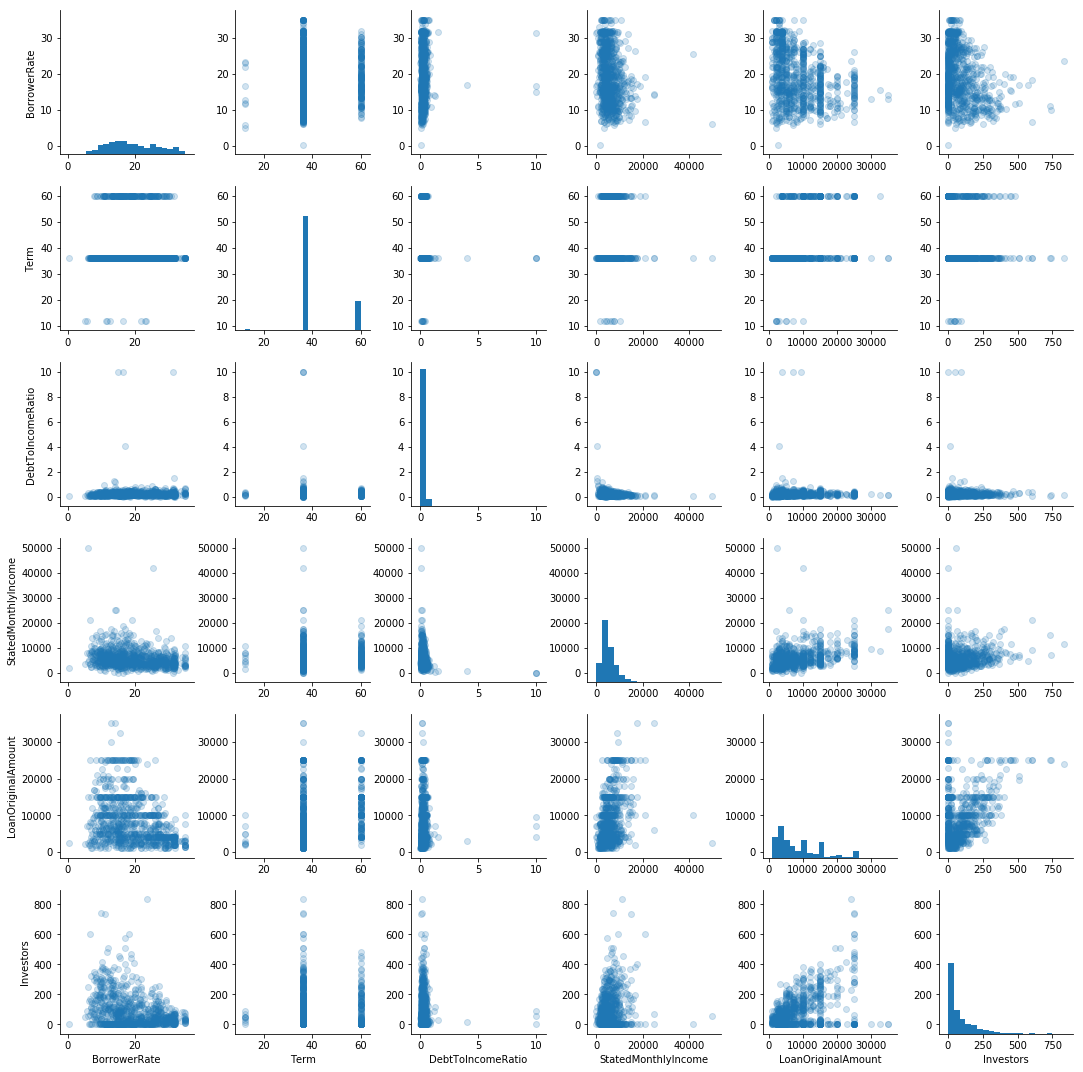

In [31]:
# plot matrix of sample 1000 Loan data so that plots are better understood
prosper_clean_samp = prosper_clean.sample(1000)
g = sns.PairGrid(data = prosper_clean_samp.dropna(), vars = numeric_vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2);

There is a weak positive correlation between LoanOriginalAmount and Term.
There is a weak positive correlation between LoanOriginalAmount and Investors.
There is a weak negative correlation between LoanOriginalAmount and BorrowerRate.

### Question 12: Why is there a Negative correlation between Loan Amount and BorrowerRate?

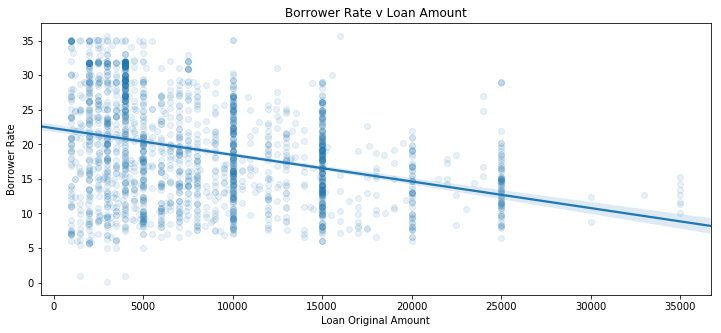

In [32]:
#generate a pseudo-random array of 2000 rows to reduce noise in our plot
np.random.seed(0)
sample = np.random.choice(prosper_clean.shape[0], 2000, replace = False)
prosper_clean_subset = prosper_clean.reindex(sample)

plt.figure(figsize =(12,5))
sns.regplot(data = prosper_clean_subset, x='LoanOriginalAmount', 
            y= 'BorrowerRate',  scatter_kws = {'alpha' : 0.1}, y_jitter = 0.1)
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower Rate')
plt.title('Borrower Rate v Loan Amount');

There is a very clear weak negative correlation. As the Loan Amount increases, the borrower's rate reduces.

### Question 13: Are there any relationship between the categorical variables?

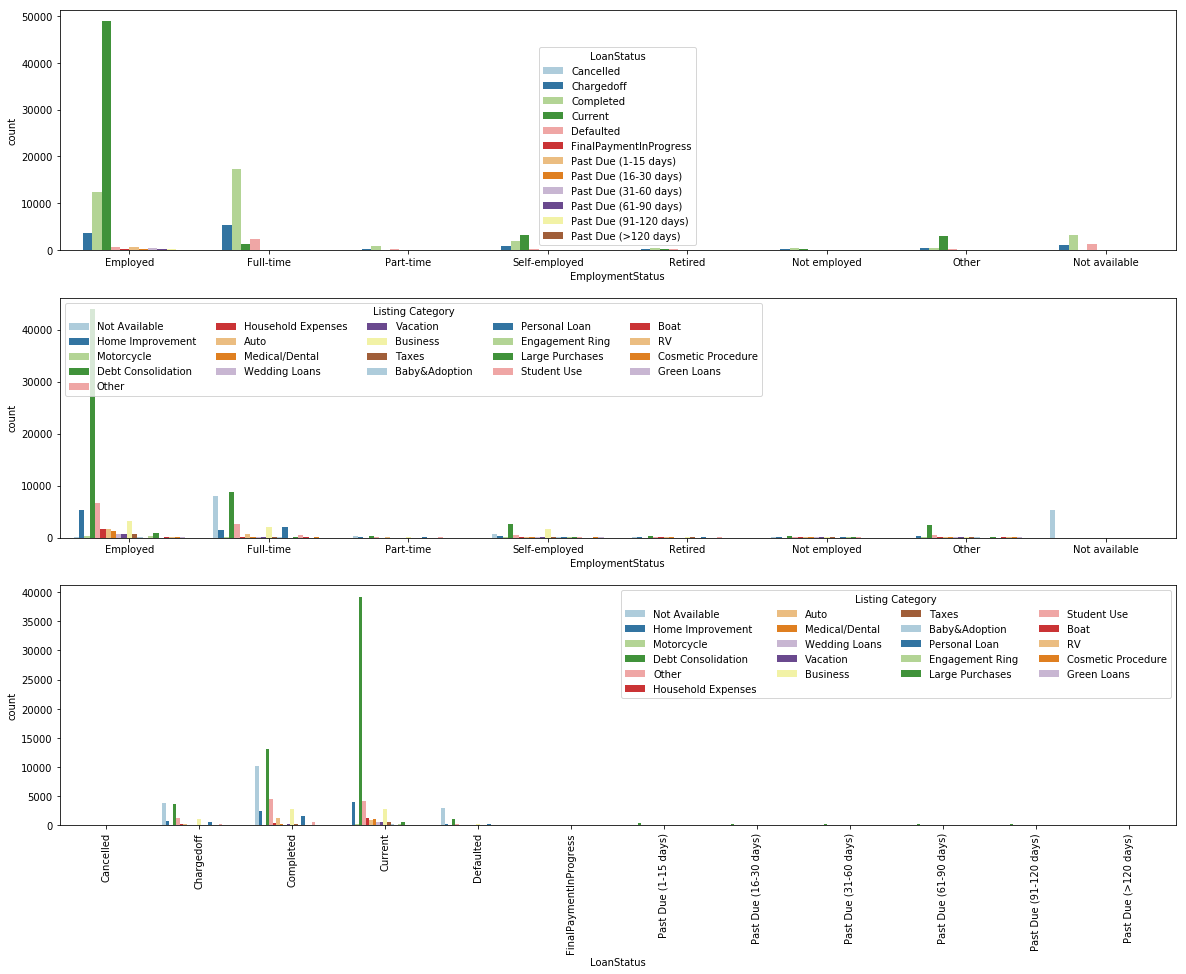

In [33]:
#Plot the categorical variables
plt.figure(figsize = [20, 15])

# subplot 1: EmploymentStatus vs. LoanStatus
plt.subplot(3, 1, 1)
sns.countplot(data = prosper_clean, x = 'EmploymentStatus', hue ='LoanStatus' , palette = "Paired")
ax.legend(loc=2, title='Loan Status')

# subplot 2: EmploymentStatus vs ListingCategory
ax = plt.subplot(3, 1, 2)
sns.countplot(data = prosper_clean, x = 'EmploymentStatus', hue = 'ListingCategory', palette ="Paired")
ax.legend(loc=2, ncol = 5, title="Listing Category"); 

# subplot 3: LoanStatus vs ListingCategory
ax = plt.subplot(3, 1, 3)
sns.countplot(data = prosper_clean, x = 'LoanStatus', hue = 'ListingCategory', palette = "Paired")
ax.legend(loc = 1, ncol = 4, title="Listing Category");
plt.xticks(rotation=90);

I observed that Employed borrower's have current loans for debt consolidation.

### Question 14: Which Borrower's occupation gets the highest loanAmount?

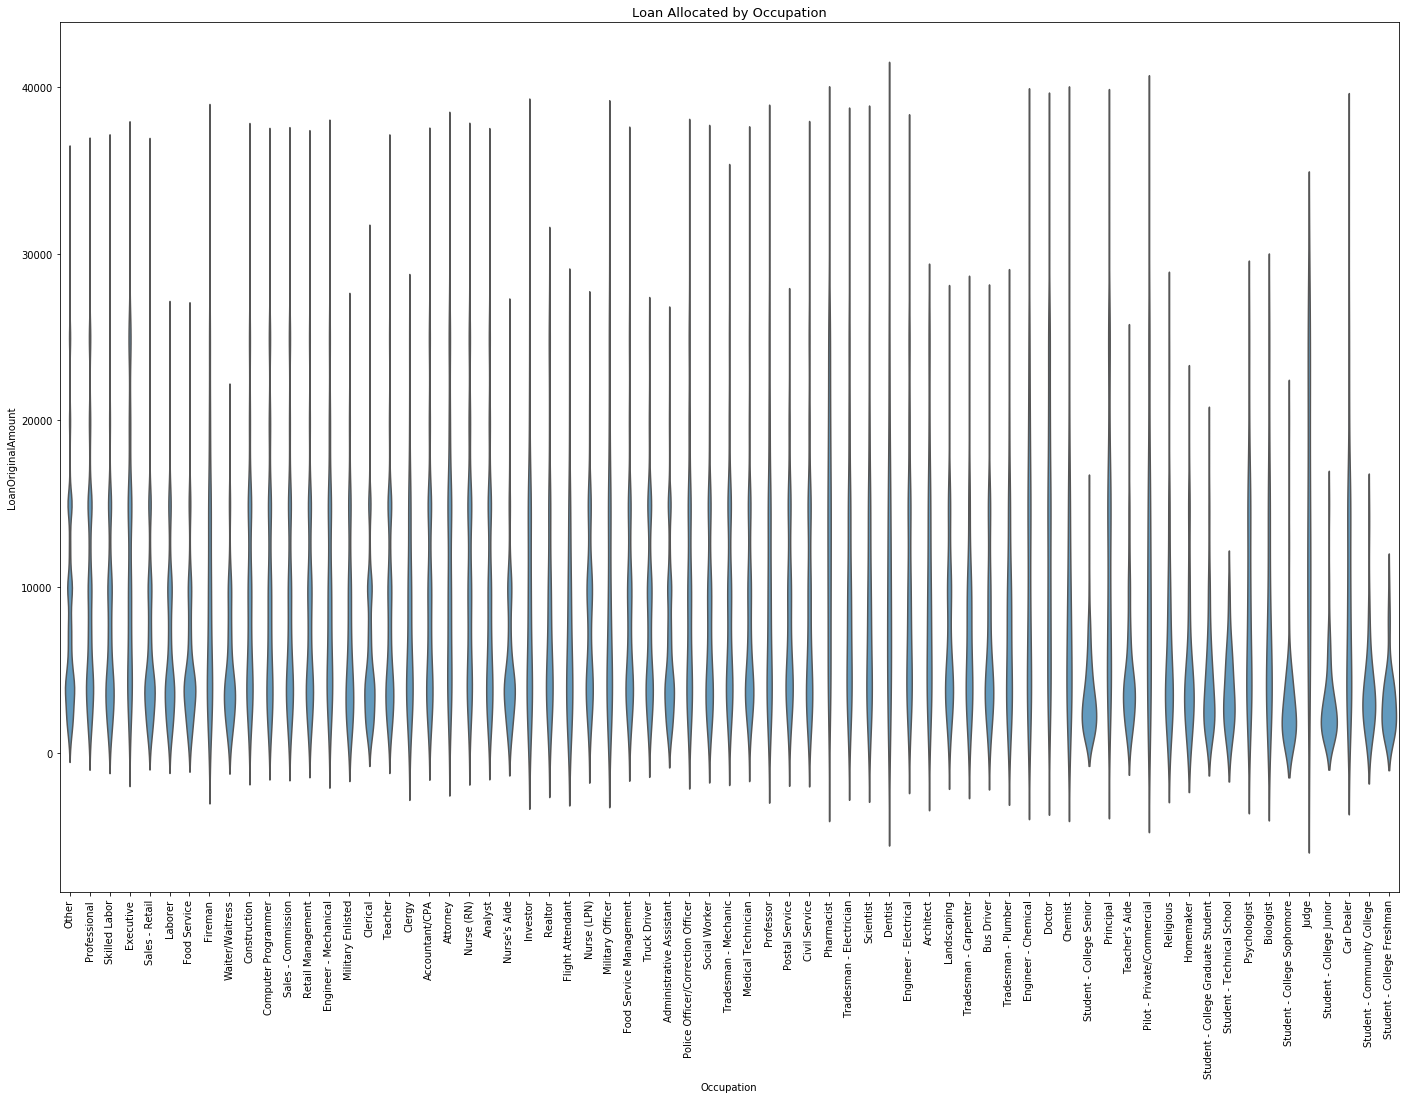

In [34]:
#using a violinplot
plt.figure(figsize= (24,16))
base_color = sns.color_palette("Blues_r")[2]
sns.violinplot(data= prosper_clean, x='Occupation', y='LoanOriginalAmount', color=base_color, inner=None)
plt.title('Loan Allocated by Occupation', fontsize = 13)
plt.xticks(rotation=90);

The Dentist has the highest LoanAmount followed by the pilot.

### Question 15: Does the Income range affect the BorrowerRate?

Text(0.5,1,'Income Range Effect on BorrowerRate')

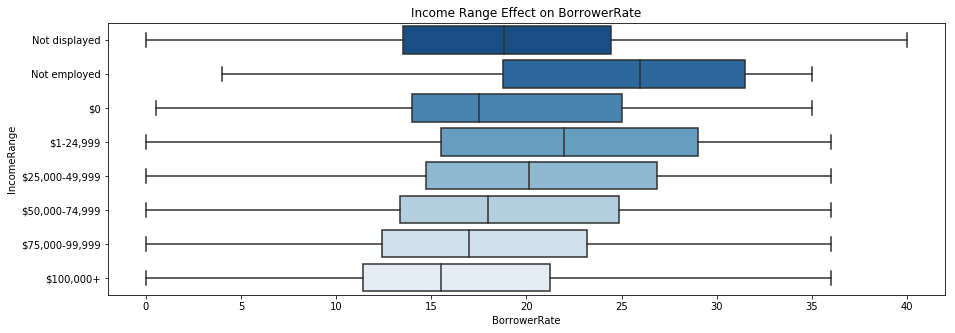

In [35]:
# Using a boxplot to show the relationship between Income range and Borrower Rate
plt.figure(figsize = [15, 5])

base_color = sns.color_palette()[0]
sns.boxplot(data = prosper_clean, y = 'IncomeRange', x = 'BorrowerRate', palette = "Blues_r", showfliers = False)
plt.title('Income Range Effect on BorrowerRate')

The IncomeRange listed 'Not-displayed', has the highest BorrowerRate.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The heatmap showed no strong correlation between most of the numerical variables. I created a PairGrid to further explain the relationship;  LoanOriginalAmount and Term had weak positive correlation and same with  LoanOriginalAmount and Investors.

I noticed a weak negative correlation with BorrowerRate and LoanOriginalAmount, I created a regplot to further understand the relationship; As the Loan Amount increases, the borrower's rate reduces.

The categorical variables relationship between the LoanStatus, ListingCategory and EmploymentStatus shows that both Employed and Full-Time listed loan for debt consolidation, while Employed has majorly current loans, Full-Time has already completed loans.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The Investors relationship with DebtIncomeRatio was the lowest positive correlation of 0.004, and a weak negative correlation with BorrowerRate and Term.

## Multivariate Exploration

I will be evaluating the relationships between several variables and show how one or more variables affect one variable.

### Question 16: Does Debt-to-Income Ratio affect BorrowerRate and LoanOriginalAmount?

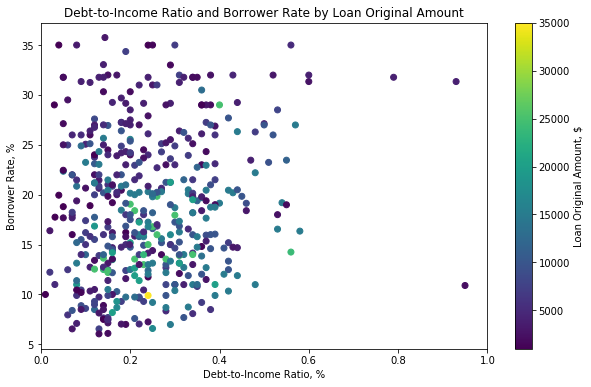

In [36]:
#plotting a scatterplot of the 3 variables
np.random.seed(5)
sample = np.random.choice(prosper_clean.shape[0], 500, replace = False)
prosper_clean_subset = prosper_clean.reindex(sample)

# plotting the data
plt.figure(figsize = [10,6])
plt.scatter(data = prosper_clean_subset, x = 'DebtToIncomeRatio', y = 'BorrowerRate', c = 'LoanOriginalAmount',
            cmap = 'viridis')
plt.xlim(0, 1.0)
plt.title('Debt-to-Income Ratio and Borrower Rate by Loan Original Amount')
plt.xlabel('Debt-to-Income Ratio, %')
plt.ylabel('Borrower Rate, %')
plt.colorbar(label = 'Loan Original Amount, $');

Majority of the Loan Amount were provided below Debt-to-Income Ratio of 0.6%. The Higher the BorrowerRate; the lower the Loan Amount. Also, the higher the BorrowerRate; the lower the Deby-to-Income Ratio. The highest Loan Amount was given at a low BorrowerRate with a Debt-to-Income Ratio between 0.2% and 0.3%. 

### Does IncomeRange Affect Loan Amount and BorrowerRate?

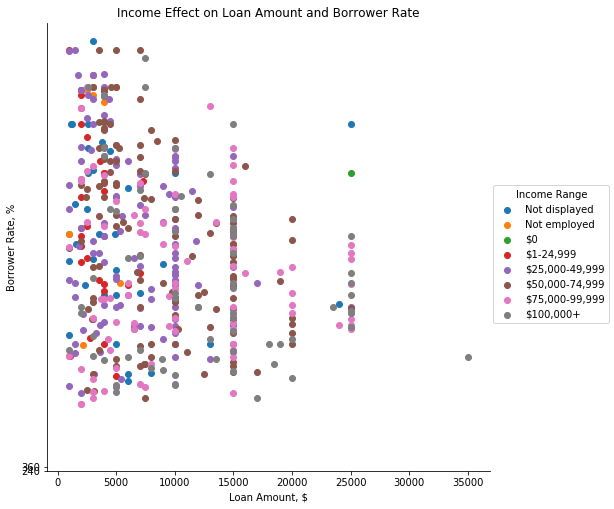

In [37]:
#plotting a chart of 2 numerical variables and 1 categorical variable
np.random.seed(5)
sample = np.random.choice(prosper_clean.shape[0], 500, replace = False)
prosper_clean_subset = prosper_clean.reindex(sample)

plt.figure(figsize = [30,20])
g = sns.FacetGrid(data = prosper_clean_subset, hue = 'IncomeRange', size = 7);
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate');
tick_props = np.arange(0.60, 1.05, 0.30)
tick_names = ['{:0.0f}'.format(v*400) for v in tick_props]
plt.yticks(tick_props, tick_names)
plt.xlabel('Loan Amount, $')
plt.ylabel('Borrower Rate, %')
plt.title('Income Effect on Loan Amount and Borrower Rate')
g.add_legend(title = 'Income Range');

The lowest Borrower Rate with the highest Loan Amount has the Income Range of $100,000+, while the Highest Borrower Rate with Low Loan Amount has the Income Range of Not displayed. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In an Earlier analysis of Loan amount and Borrower Rate, it showed that as Loan Amount inceases; Borrower Rate reduces i.e it has a weak negative correlation. Then i compared Borrower Rate with Income Range, and it showed that Low Borrower Rate is given to Borrowers with high Income Range.
Then to show the relationship between the 3 variables, it showed that The lowest BorrowerRate is granted on a High Loan Amount for a Borrower with a High Income. Also the Highest Loan Amount has a Low Debt-to-Income Ratio.

### Were there any interesting or surprising interactions between features?

Noting surprising, but its interesting to know that a Borrower with a High Income gets a High Loan Amount with Low BorrowerRate.

## Conclusions
The main feature of my analysis was to determine the amount of loan that can be granted to a customer and the conditions around the Loan.

#### Main Findings
1. Major Loan distribution is 36months(3years) Term.
2. Most Loan was allocated in 2013.
3. Major Listing category for a Loan is for Debt Consolidation.
4. Employed borrowers gets more Loan Approval.
5. The major Loan distribution (36months) has a Loan Status of current, completed, charged off and defaulted loan status.
6. A weak correlation between Loan Amount and Borrower rate indicates that as Loan Amount increases, Borrower rate reduces.
7. A Borrower with High Income, gets a High Loan Amount, with low Borrower Rate and low Debt-to-Income Ratio.

In [38]:
#save the clean and transformed dataset to a csv
prosper_clean.to_csv('ProsperLoanData_cleaned.csv')